# Travel Time and Ray Path Plotting Examples
These examples are taken from the obspy.org website

#### First import obspy itself!

In [1]:
import obspy

### Decide if you want to see figures inline or in separate windows ...

In [15]:
%matplotlib qt   

In [13]:
%matplotlib inline

#### Travel Time Plot

In [16]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=10, ax=ax, fig=fig,
                       phase_list=['P', 'PP', 'S'], npoints=200)

Cartesian raypaths

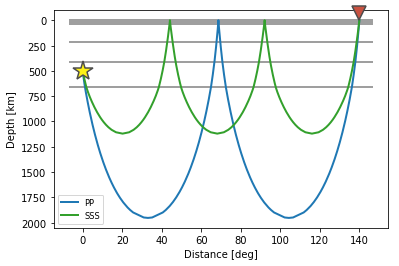

In [4]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(500, 140, phase_list=['PP', 'SSS'])
arrivals.plot_rays(plot_type='cartesian', phase_list=['PP', 'SSS'],
                   plot_all=False, legend=True)

Spherical raypaths

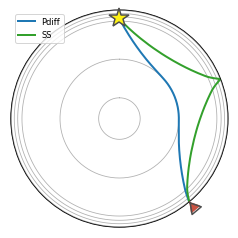

In [5]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(500, 140, phase_list=['Pdiff', 'SS'])
arrivals.plot_rays(plot_type='spherical', phase_list=['Pdiff', 'SS'],
                   legend=True)

Plotting raypaths to multiple distances

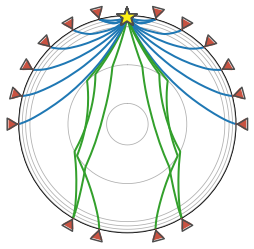

In [6]:
from obspy.taup.tau import plot_ray_paths
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax = plot_ray_paths(source_depth=100, ax=ax, fig=fig, phase_list=['P', 'PKP'],
                    npoints=25)

Here is a really fancy example:

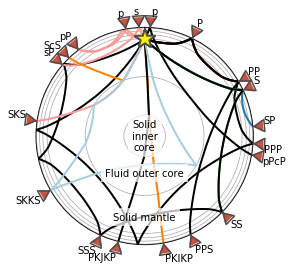

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from obspy.taup import TauPyModel


PHASES = [
    # Phase, distance
    ('P', 26),
    ('PP', 60),
    ('PPP', 94),
    ('PPS', 155),
    ('p', 3),
    ('pPcP', 100),
    ('PKIKP', 170),
    ('PKJKP', 194),
    ('S', 65),
    ('SP', 85),
    ('SS', 134.5),
    ('SSS', 204),
    ('p', -10),
    ('pP', -37.5),
    ('s', -3),
    ('sP', -49),
    ('ScS', -44),
    ('SKS', -82),
    ('SKKS', -120),
]

model = TauPyModel(model='iasp91')

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# Plot all pre-determined phases
for phase, distance in PHASES:
    arrivals = model.get_ray_paths(700, distance, phase_list=[phase])
    ax = arrivals.plot_rays(plot_type='spherical',
                            legend=False, label_arrivals=True,
                            plot_all=True,
                            show=False, ax=ax)

# Annotate regions
ax.text(0, 0, 'Solid\ninner\ncore',
        horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

## Try some modifications of the above yourself in the space below!